<a href="https://colab.research.google.com/github/derrickgzq/datachallenge2.0/blob/main/data_challenge_2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install pycaret

In [ ]:
!pip install --upgrade pycaret

In [ ]:
import math
import pandas as pd
import numpy as np
from pycaret.classification import *

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/derrickgzq/datachallenge2.0/main/diabetes_data_upload%20(1).csv')

In [ ]:
df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0})

In [ ]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,1,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,1,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,1,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,1,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [ ]:
clf = setup(df, target = 'class')

,Description,Value
0,Session id,6355
1,Target,class
2,Target type,Binary
3,Target mapping,"Negative: 0, Positive: 1"
4,Original data shape,"(520, 17)"
5,Transformed data shape,"(520, 17)"
6,Transformed train set shape,"(364, 17)"
7,Transformed test set shape,"(156, 17)"
8,Ordinal features,14
9,Numeric features,2


In [ ]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9698,0.9885,0.9686,0.9828,0.9749,0.9370,0.9391,0.1950
rf,Random Forest Classifier,0.9670,0.9972,0.9775,0.9697,0.9731,0.9305,0.9320,0.3350
et,Extra Trees Classifier,0.9670,0.9980,0.9729,0.9743,0.9730,0.9306,0.9324,0.4900
gbc,Gradient Boosting Classifier,0.9616,0.9872,0.9597,0.9790,0.9681,0.9196,0.9231,0.3930
lightgbm,Light Gradient Boosting Machine,0.9616,0.9907,0.9640,0.9743,0.9681,0.9196,0.9225,0.2320
dt,Decision Tree Classifier,0.9589,0.9557,0.9686,0.9667,0.9666,0.9129,0.9160,0.1510
qda,Quadratic Discriminant Analysis,0.9345,0.9887,0.9779,0.9242,0.9493,0.8566,0.8634,0.3310
lr,Logistic Regression,0.9203,0.9700,0.9198,0.9496,0.9335,0.8339,0.8368,0.2110
ada,Ada Boost Classifier,0.9040,0.9592,0.9067,0.9382,0.9201,0.7996,0.8053,0.3030
ridge,Ridge Classifier,0.9038,0.0000,0.8615,0.9811,0.9152,0.8056,0.8182,0.2020


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
best_model

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              objective='binary:logistic', predictor=None, ...)

In [ ]:
gbc = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9730,0.9969,1.0000,0.9583,0.9787,0.9417,0.9433
2,0.9459,0.9752,0.9565,0.9565,0.9565,0.8851,0.8851
3,0.9459,0.9876,0.9565,0.9565,0.9565,0.8851,0.8851
4,0.9444,0.9740,0.9091,1.0000,0.9524,0.8861,0.8919
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9722,0.9968,1.0000,0.9565,0.9778,0.9408,0.9424


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
evaluate_model(gbc)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
tuned_gbc = tune_model(gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9459,1.0000,1.0000,0.9200,0.9583,0.8818,0.8880
1,0.9730,0.9969,1.0000,0.9583,0.9787,0.9417,0.9433
2,0.9730,0.9814,1.0000,0.9583,0.9787,0.9417,0.9433
3,0.9459,0.9876,0.9565,0.9565,0.9565,0.8851,0.8851
4,0.9167,0.9708,0.9091,0.9524,0.9302,0.8269,0.8283
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9444,1.0000,1.0000,0.9167,0.9565,0.8800,0.8864
7,0.9444,0.9935,1.0000,0.9167,0.9565,0.8800,0.8864
8,0.9444,1.0000,1.0000,0.9167,0.9565,0.8800,0.8864


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


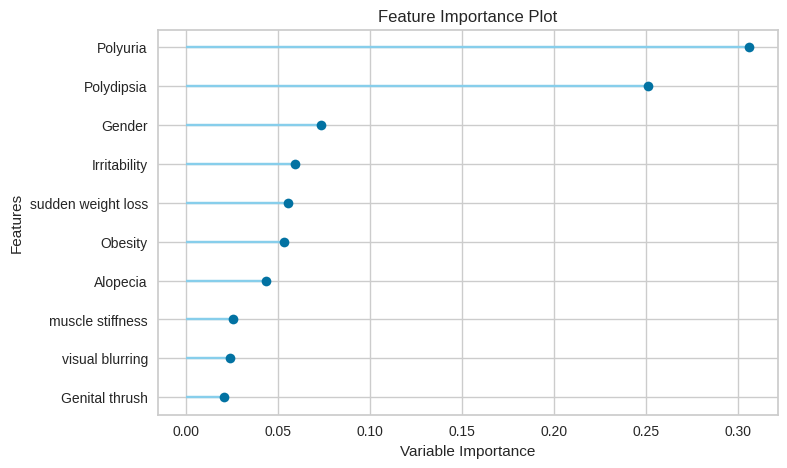

In [ ]:
plot_model(gbc, plot = 'feature')

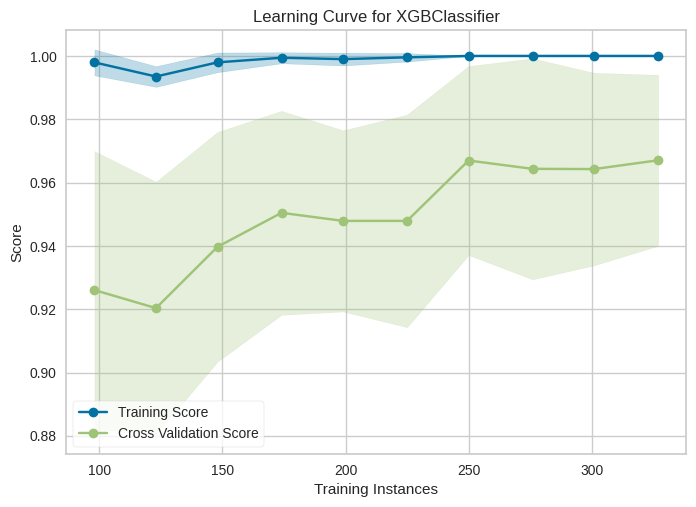

In [ ]:
plot_model(gbc, plot = 'learning')

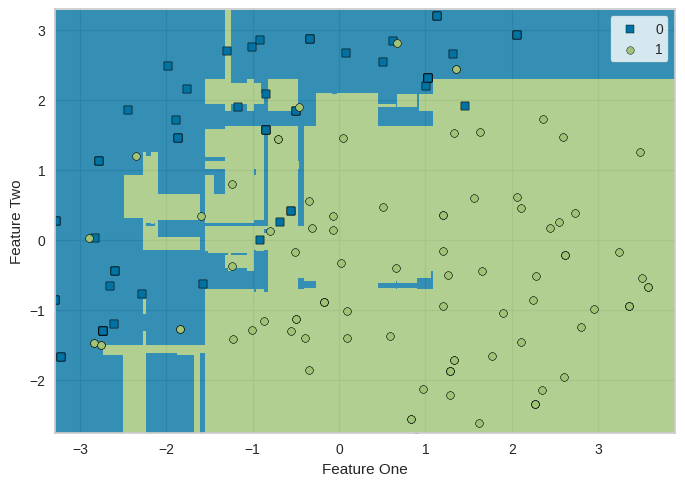

In [ ]:
plot_model(gbc, plot = 'boundary')

In [ ]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [ ]:
preds = gbc.predict(pd.DataFrame({#'Pregnancies' : [4 ,5, 6],
                                  "Glucose" : [7, 8, 9],
                                  "BloodPressure" : [10, 11, 12],
                                  'SkinThickness' : [30,35,28],
                                  'Insulin' : [20,0,25],
                                  'BMI' : [33.6,33.4,33.2],
                                  'DiabetesPedigreeFunction' : [0.12,0.13,0.14],
                                  'Age' : [12,13,14]}))

In [ ]:
preds

array([0, 0, 0], dtype=int8)

In [ ]:
df.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [ ]:
preds = gbc.predict(pd.DataFrame({'Age': [21,68],
                                  'Gender': [1,1],
                                  'Polyuria': [0,0],
                                  'Polydipsia': [0,0],
                                  'sudden weight loss': [0,0],
                                  'weakness': [0,1],
                                  'Polyphagia': [0,1],
                                  'Genital thrush': [0,0],
                                  'visual blurring': [0,1],
                                  'Itching': [0,0],
                                  'Irritability': [0,0],
                                  'delayed healing': [0,0],
                                  'partial paresis': [0,0],
                                  'muscle stiffness': [0,0],
                                  'Alopecia': [0,0],
                                  'Obesity': [0,0]}))

In [ ]:
preds

array([0, 0])

In [ ]:
preds = gbc.predict(pd.DataFrame({'Age': [21,48,19],
                                  'Gender': [1,0,0],
                                  'Polyuria': [0,0,0],
                                  'Polydipsia': [0,0,0],
                                  'sudden weight loss': [0,0,0],
                                  'weakness': [0,0,1],
                                  'Polyphagia': [1,1,0],
                                  'Genital thrush': [0,0,0],
                                  'visual blurring': [0,0,0],
                                  'Itching': [0,0,0],
                                  'Irritability': [0,0,0],
                                  'delayed healing': [0,0,0],
                                  'partial paresis': [0,0,0],
                                  'muscle stiffness': [0,0,0],
                                  'Alopecia': [0,0,0],
                                  'Obesity': [0,1,0]}))

In [ ]:
preds

array([0, 1, 0])